In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("./..")

In [3]:
from pathlib import Path
import pprint
import hashlib

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as T
import torch.nn.functional as F
from torch.utils.data import Dataset
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
from dotted_dict import DottedDict

In [4]:
#np.set_printoptions(threshold=sys.maxsize)

In [5]:
ds_train = datasets.MNIST(root='./data', train=True, download=True, transform=T.ToTensor())
ds_valid = datasets.MNIST(root="./data", train=False, download=True, transform=T.ToTensor())

In [6]:
ds_train = datasets.MNIST(root='./data', train=True, download=True)
ds_valid = datasets.MNIST(root="./data", train=False, download=True)

In [7]:
ds_train[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x219ECC10700>, 5)

In [ ]:
plt.imshow(ds_train[0][0])

### Padding


In [7]:
pad = T.Pad(padding=[2,2,2,2])(ds_train[0][0])
#0 & 2 -> x
#1 & 3 -> y

In [8]:
print(pad)

<PIL.Image.Image image mode=L size=32x32 at 0x23C737221F0>


In [9]:
np.random.randint(1, high=5, size=None, dtype=int)

2

### Random Pads

In [10]:
def pad_rand():
    ref = 8
    left = np.random.randint(1, high=9, size=None, dtype=int)
    rigth = ref - left
    up = np.random.randint(1, high=9, size=None, dtype=int)
    down = ref - up
    
    return [left, up, rigth, down]
    

In [11]:
pad_rand()

[6, 7, 2, 1]

In [12]:
pad_0 = T.Pad(padding=pad_rand())(ds_train[0][0])

In [13]:
pr = np.array(pad_0)
print(pr)
print(pr.shape)
print(pr.max())
print(pr.min())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(36, 36)
255
0


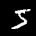

In [14]:
pad_0

In [15]:
pad_42 = T.Pad(padding=pad_rand())(ds_train[42][0])

In [16]:
pr = np.array(pad_42)
print(pr)
print(pr.shape)
print(pr.max())
print(pr.min())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(36, 36)
255
0


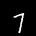

In [19]:
pad_42

In [20]:
a = np.array(pad_42)
b = np.array(pad_0)
add = a + b 

In [21]:
pr = add
print(pr)
print(pr.shape)
print(pr.max())
print(pr.min())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(36, 36)
255
0


In [22]:
pil = Image.fromarray(add, mode='L')

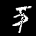

In [23]:
pil

In [24]:
rec = add - np.array(pad_0)

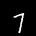

In [25]:
Image.fromarray(rec, mode='L')

In [ ]:
pad_1 = T.Pad(padding=pad_rand())(ds_train[1][0])
pad_15 = T.Pad(padding=pad_rand())(ds_train[15][0])

a = np.array(pad_1)
b = np.array(pad_15)
add = a + b
pil = Image.fromarray(add, mode='L')

i1 = T.ToTensor()(pad_1)
i2 = T.ToTensor()(pad_15)
i3 = T.ToTensor()(pil)
cat = torch.cat([i1,i2,i3], dim=0)
cat = cat.unsqueeze(1)
grid = torchvision.utils.make_grid(cat, nrow=3)
grid = grid.permute(1, 2, 0)
plt.imshow(grid)
plt.show()

In [131]:
pad_1 = T.Pad(padding=pad_rand())(ds_train[1][0])
pad_15 = T.Pad(padding=pad_rand())(ds_train[15][0])

a = T.ToTensor()(pad_1)
b = T.ToTensor()(pad_15)
add = torch.clamp(a + b,min=0, max=1)
pil = T.ToPILImage()(add)

#i1 = T.ToTensor()(pad_1)
#i2 = T.ToTensor()(pad_15)
#i3 = T.ToTensor()(pil)
cat = torch.cat([a,b,add], dim=0)
cat = cat.unsqueeze(1)
grid = torchvision.utils.make_grid(cat, nrow=3)
grid = grid.permute(1, 2, 0)
plt.imshow(grid)
plt.show()

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

### generate from tensor

In [17]:
ds_train = datasets.MNIST(root='./data', train=True, download=True, transform=T.ToTensor())
ds_valid = datasets.MNIST(root="./data", train=False, download=True, transform=T.ToTensor())

In [18]:
ds_train[0][0].size()

torch.Size([1, 28, 28])

In [ ]:
pad_1 = T.Pad(padding=pad_rand())(ds_train[1][0])
pad_15 = T.Pad(padding=pad_rand())(ds_train[15][0])

a = pad_1
b = pad_15
add = torch.clamp(a + b,min=0, max=1)

cat = torch.cat([a,b,add], dim=0)
cat = cat.unsqueeze(1)
grid = torchvision.utils.make_grid(cat, nrow=3)
grid = grid.permute(1, 2, 0)
plt.imshow(grid)
plt.show()

In [ ]:
n = 100
size = 10
np.random.randint(1, high=n, size=size, dtype=int)

In [ ]:
np.random.seed(seed=0)

img, label = ds_train.data, ds_train.targets
img = img[:10]
label = label[:10]
n_multi = 3

ref = 7
i_ref = ds_train.data[ref]
l_ref = ds_train.targets[ref]
indexes = np.where(label != l_ref)[0]
indexes = np.random.choice(indexes,n_multi,replace=False)


print(l_ref)
print(label)
print(indexes)
print(label[indexes[0]],label[indexes[1]],label[indexes[2]])






In [10]:
def pad_rand():
    ref = 8
    left = np.random.randint(1, high=9, size=None, dtype=int)
    rigth = ref - left
    up = np.random.randint(1, high=9, size=None, dtype=int)
    down = ref - up
    
    return [left, up, rigth, down]



In [11]:
def multimatch(images, labels, ref_idx, n=1000):
    #reference img
    img_ref = images[ref_idx]
    lab_ref = labels[ref_idx]
    
    #choose random top images from different classes
    top_idx = np.where(labels != lab_ref)[0]
    top_idx = np.random.choice(top_idx,n,replace=False)

    all_imgs = []
    all_targets1 = []
    all_targets2 = []

    for i, idx in enumerate(top_idx):
        
        base  = T.Pad(padding=pad_rand())(images[ref_idx])
        top   = T.Pad(padding=pad_rand())(images[top_idx[i]])

        merge = torch.clamp(base + top,min=0, max=1)
        merge = merge.unsqueeze(0)
        label1 = labels[ref_idx]
        label2 = labels[top_idx[i]]
        
        all_imgs.append(merge)
        all_targets1.append(label1)
        all_targets2.append(label2)
    
    return all_imgs, all_targets1, all_targets2

img, label1, label2 = multimatch(images=ds_train.data, labels=ds_train.targets, ref_idx=0, n=22)
print(len(img), "\n", label1, "\n", label2)

22 
 [tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5)] 
 [tensor(3), tensor(2), tensor(8), tensor(7), tensor(8), tensor(2), tensor(1), tensor(9), tensor(1), tensor(1), tensor(7), tensor(6), tensor(7), tensor(8), tensor(8), tensor(1), tensor(0), tensor(6), tensor(4), tensor(6), tensor(3), tensor(3)]


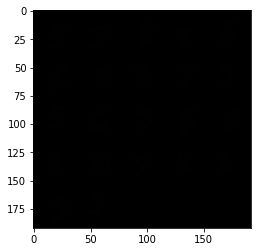

In [12]:
grid = torchvision.utils.make_grid(img, nrow=5)
grid = grid.permute(1, 2, 0)
plt.imshow(grid)
plt.show()

tensor(5)
tensor(1)


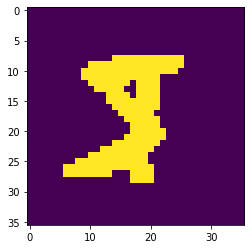

In [13]:
jj = 9
print(label1[jj])
print(label2[jj])
plt.imshow(img[jj].permute(1, 2, 0))

# Generator to pil


In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import sys
sys.path.append("./..")

In [92]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [93]:
from pathlib import Path
import pprint
import hashlib
import pickle

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as T
import torch.nn.functional as F
from torch.utils.data import Dataset
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
from dotted_dict import DottedDict

In [94]:
ds_train = datasets.MNIST(root='./data', train=True, download=True, transform=T.ToTensor())
ds_valid = datasets.MNIST(root="./data", train=False, download=True, transform=T.ToTensor())

In [95]:
def pad_rand():
    ref = 8
    left = np.random.randint(1, high=9, size=None, dtype=int)
    rigth = ref - left
    up = np.random.randint(1, high=9, size=None, dtype=int)
    down = ref - up
    
    return [left, up, rigth, down]

In [108]:
def mkdir_directories(dirs, parents, exist_ok):
    for director in dirs:
        Path(director).mkdir(parents=parents, exist_ok=exist_ok)

def multimatch(p_data, images, labels, n=1000):
    #paths
    p_data = Path(p_data)
    p_imgs = p_data  / 'Img'
    
    mkdir_directories([p_data, p_imgs], parents=True, exist_ok=True)

    #lists
    all_targets1 = []
    all_targets2 = []
    
    #generator index
    index = 1
    
    #test dataset
    test = images[0:3]
    print(test.size())
    for j, image in enumerate(test):
    
    #generate for whole dataset
    #for j, image in enumerate(images):
    
        #reference img
        img_ref = images[j]
        lab_ref = labels[j]

        #choose random top images from different classes
        top_idx = np.where(labels != lab_ref)[0]
        top_idx = np.random.choice(top_idx,n,replace=False)

        #generate images
        for i, idx in enumerate(top_idx):
            
            #randomize position
            base  = T.Pad(padding=pad_rand())(images[j])
            top   = T.Pad(padding=pad_rand())(images[top_idx[i]])
            
            #merge images
            merge = torch.clamp(base + top,min=0, max=1)
            merge = merge.unsqueeze(0)
            
            #add labels to list
            label1 = labels[j]
            label2 = labels[top_idx[i]]
            all_targets1.append(label1)
            all_targets2.append(label2)

            #Save Img as png
            torchvision.utils.save_image(merge.float(), p_imgs / "{:08d}.png".format(index))
            index += 1 
    
    #create target 1
    file_targets1 = open(p_data /'targets_1.plk', 'wb')
    pickle.dump(all_targets1, file_targets1)
    file_targets1.close()
    
    #create target 2
    file_targets2 = open(p_data /'targets_2.plk', 'wb')
    pickle.dump(all_targets2, file_targets2)
    file_targets2.close()

multimatch(p_data="data/MultiMNIST" ,images=ds_train.data, labels=ds_train.targets,n=20)

torch.Size([3, 28, 28])


# Load Dataset

In [105]:
file_targets2 = open('data/MultiMNIST/t/targets_1.plk', 'rb')
l_data = pickle.load(file_targets2)
file_targets2.close()
print(l_data)
file_targets2 = open('data/MultiMNIST/t/targets_2.plk', 'rb')
l_data = pickle.load(file_targets2)
file_targets2.close()
print(l_data)

[tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
[tensor(6), tensor(3), tensor(3), tensor(0), tensor(9), tensor(9), tensor(9), tensor(8), tensor(8), tensor(9), tensor(9), tensor(6), tensor(0), tensor(2), tensor(3), tensor(7), tensor(8), tensor(3), tensor(9), tensor(2), tensor(6), tensor(8), tensor(7), tensor(5), tensor(9), tensor(6), tensor(7), tensor(5), tensor(3), tensor(9), tensor(6), tensor(4), tensor(4), tensor(3), tensor(6), tensor(3), tensor(5), tensor(1), tensor(4), tensor(7)]


In [46]:


data_dir = 'data/MultiMNIST/t/Img/'

filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']

In [47]:
filenames = [name for name in os.listdir(data_dir)]

In [60]:
tsr_img = torchvision.io.read_image('data/MultiMNIST/t/Img/00000006.png')

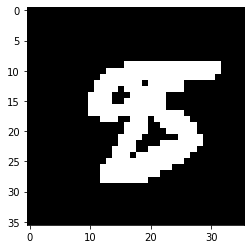

In [61]:
plt.imshow(tsr_img.permute((1,2,0)))

In [62]:
tsr_img.size()

torch.Size([3, 36, 36])

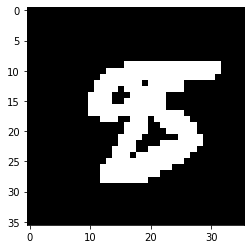

In [66]:
a = Image.open('data/MultiMNIST/t/Img/00000006.png')
plt.imshow(a)
a.size()

## Dataloader via Torch tools

In [109]:
import pickle

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as T
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from PIL import Image

In [ ]:
class MyDataClass(Dataset):
    def __init__(self, image_path, transform=None):
        super(MyDataClass, self).__init__()
        self.data = datasets.ImageFolder(image_path,  transform)    # Create data from folder

    def __getitem__(self, idx):
        x, y = self.data[idx]
        return x, y

    def __len__(self):
        return len(self.data)

In [127]:
class DataClass(Dataset):
    def __init__(self, root, train=True, transform=None, target_transform=None, generate=False):
        self.p_root = Path(root)
        self.p_img = self.p_root / "Img"
        self.target_transform = target_transform
        self.train = train
        
        if generate:
            pass
            #self.generate()
        
        #exist check!!!

        file = open(self.p_root / 'targets_1.plk', 'rb')
        self.targets_1 = pickle.load(file)
        file.close()

        file = open(self.p_root / 'targets_2.plk', 'rb')
        self.targets_2 = pickle.load(file)
        file.close()
        
        self.data = datasets.ImageFolder(self.p_img,  transform)

    def __getitem__(self, idx):
        x = self.data[idx]    
        y = self.targets_1[idx]
        z = self.targets_2[idx]
        
        if self.target_transform is not None:
            y = self.target_transform(y)
            z = self.target_transform(z)
        
        return x, y, z
    
    def __len__(self):
        return len(self.targets_1)

In [130]:
root = Path()
root = "data/MultiMNIST"
A = DataClass(root)
A.__len__()
A.__getitem__(0)

((<PIL.Image.Image image mode=RGB size=36x36 at 0x2021DDC0AC0>, 0),
 tensor(5),
 tensor(0))

In [ ]:
root = Path.absolute()        # Map to dataset folder location
img_path = root/'dataset_folder'

tsfm = transforms.Compose([
        # Misc transforms here.
        transforms.ToTensor()
])

data = MyDataClass(img_path, tsfm) # create the dataset

dataloader = DataLoader(data, batch_size=20)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=36x36 at 0x2021DDE5850>
